In [ ]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'10',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'f21f12d6-ab86-4af9-80d4-37468729cbd3',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [ ]:
type(data)

In [ ]:
import pandas as pd

pd.set_option('display.max_columns', None)

In [ ]:
df = pd.json_normalize(data['data'])

df['timestamp'] = pd.to_datetime('now')

df

In [ ]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'10',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'f21f12d6-ab86-4af9-80d4-37468729cbd3',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df
    
    if not os.path.isfile(r'C:\Users\Mondre\Desktop\Python\API\API.csv'):
        df.to_csv(r'C:\Users\Mondre\Desktop\Python\API\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\Mondre\Desktop\Python\API\API.csv', mode='a', header=False)
        

In [ ]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('api_runner completed successfully')
    sleep(60)
exit()

In [ ]:
df

In [ ]:
df2 = pd.read_csv(r'C:\Users\Mondre\Desktop\Python\API\API.csv')
df2

In [ ]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [ ]:
df

In [ ]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

In [ ]:
df4 = df3.stack()
df4

In [ ]:
df5 = df4.to_frame(name='values')
df5

In [ ]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

In [ ]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

In [44]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'], ['1h', '24h', '7d', '30d', '60d', '90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.17376
1,Bitcoin,24h,1.09709
2,Bitcoin,7d,7.33924
3,Bitcoin,30d,35.65227
4,Bitcoin,60d,37.89605
5,Bitcoin,90d,13.94827
6,Ethereum,1h,-0.20523
7,Ethereum,24h,-0.31041
8,Ethereum,7d,2.17323
9,Ethereum,30d,32.73718


In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

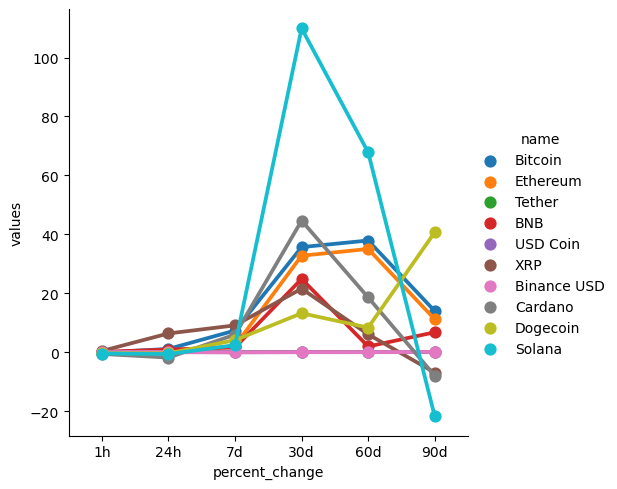

In [45]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')
plt.show()

In [47]:
df8 = df[['name', 'quote.USD.price', 'timestamp']]
df8 = df8.query("name == 'Bitcoin'")
df8

,name,quote.USD.price,timestamp
0,Bitcoin,22859.64616,2023-01-23 20:27:35.267765


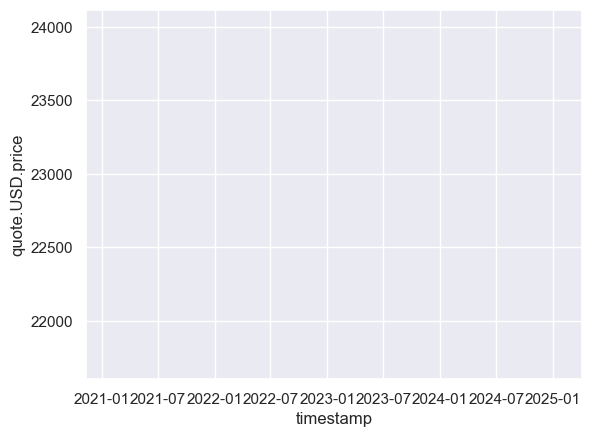

In [51]:
sns.set_theme(style='darkgrid')

sns.lineplot(x='timestamp', y='quote.USD.price', data=df8)
plt.show()